In [3]:
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
data
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df
#check for null values: df.isna().sum

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#just to see what it is
#data.feature_names
#data.data
#data.target_names

In [5]:
df["target"].value_counts()

,count
target,
0,50
1,50
2,50


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

<Axes: >

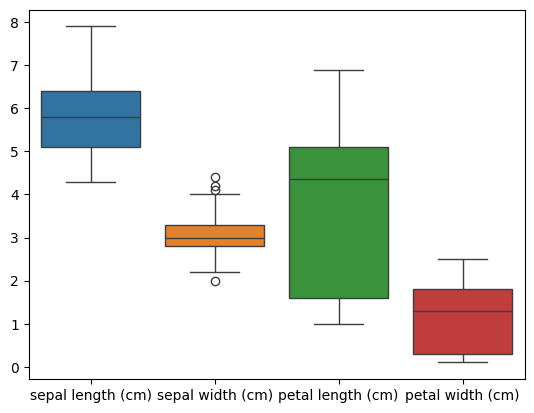

In [6]:
import seaborn as sns #import library to check for outliers
sns.boxplot(df.iloc[:, :4]) #iloc means index location, every row and first four columns
#every dot outside the box plot is an outlier

In [7]:
from sklearn.model_selection import train_test_split #import library to split data into train and test

In [8]:
x = df.drop(columns=["target"]) #Order preserved gotta do x then y #features
y = df["target"] #figures
x_train, x_test, y_train, y_test = train_test_split(x, y) #randomly select a bunch of different rows for test and train

In [9]:
from sklearn.tree import DecisionTreeClassifier #defining a model
model = DecisionTreeClassifier()
model.fit(x_train, y_train) #fitting the model #dont do test here it has to be train

DecisionTreeClassifier()

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [40, 38, 34]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal length (cm) <= 4.95\ngini = 0.498\nsamples = 72\nvalue = [0, 38, 34]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'petal length (cm) <= 5.05\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.7, 0.3, 'sepal width (cm) <= 2.75\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Tex

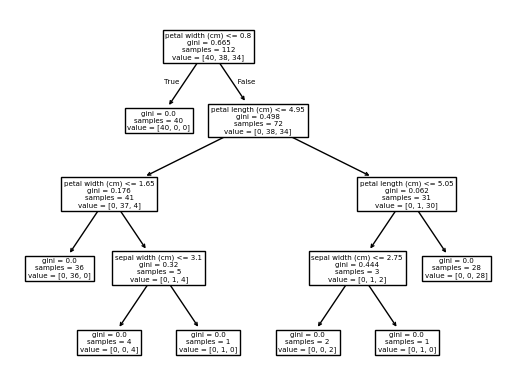

In [10]:
from sklearn.tree import plot_tree #import library to plot tree
plot_tree(model, feature_names=x_train.columns)

In [12]:
x_train.loc[0, "sepal length (cm)"]

5.1

In [13]:
model.score(x_test, y_test) #accuracy of model

0.9736842105263158